## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo VI - Redes neurais para dados sequenciais</span>


### <span style="color:darkred">Exercícios</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

### Exercício 1)

Considerando o treinamento de uma rede neural em que é utilizado um exemplo por vez para adaptar os pesos, qual das alternativas abaixo indica a diferença de uma unidade recorrente para uma não recorrente?

 (a) Unidades recorrentes consideram que há dependência entre exemplos de cada iteração sucessiva e por isso mantêm uma memória relacionada unicamente ao exemplo imediamente anterior ao atual<br>
 (b) Unidades recorrentes possuem uma quantidade relativamente menor de parâmetros a serem computados quando comparada às não recorrentes<br>
 (c) Unidades recorrentes consideram que cada exemplo é independente dos demais e portanto apenas o exemplo atual é considerado na atualização de seus pesos<br>
(d) Unidades recorrentes possuem uma memória interna que com base nos exemplos de iterações anteriores e que influencia na saída da iteração atual.<br>

---

### Exercício 2)

Quais dos cenários abaixo não necessitam de redes recorrentes ou que consideram a dependência sequencial dos dados?

 (a) Tradução de sentenças entre dois idiomas<br>
 (b) Descrição automática de cenas em um clipe de vídeo<br>
 (c) Estimar o valor de um imóvel colocado a venda, com base em suas características<br>
 (d) Predição de valor futuro de uma série temporal relacionada ao preço de uma ação na bolsa de valores<br>
 

---
### Exercício 3)

Qual a principal diferença entre o "output gate" da LSTM e o "update gate" da GRU?

 (a) O update gate (GRU) filtra qual parte do sumário anterior será mantida e qual será descartada, e o output gate (LSTM) filtra qual parte do estado de célula anterior será mantida e qual será descartada<br>
 (b) O update gate (GRU) realiza uma combinação entre o sumário atual e o anterior enquanto o output gate (LSTM) faz uma combinação entre o estado de célula atual e o anterior <br>
 (c) O update gate (GRU) realiza uma combinação entre o sumário atual e o anterior enquanto o output gate (LSTM) utiliza do estado de célula para ponderar uma combinação entre a entrada atual e o sumário anterior<br>
 (d) O update gate (GRU) realiza uma combinação entre a entrada atual e o sumário anterior o sumário atual eenquanto o output gate (LSTM) faz uma combinação entre o estado de célula atual e o anterior<br>
 

---
### Exercício 4)

Representa uma opção menos adequada para o projeto de redes neurais aplicadas a dados sequenciais:

(a) O uso de convoluções para capturar o posicionamento local de dados sequenciais <br>
(b) O uso de unidades densas para melhor aprender a relação entre dados correlacionados sequencialmente<br>
(c) O uso de unidades do tipo recorrente para capturar dependências na ordem em que os exemplos são vistos pela rede neural<br>
(d) O uso de mecanismos de atenção para identificar relações entre representações sequenciais<br>


### Exercício 5)

O mecanismo de atenção no contexto de dados sequenciais é implementado para:

(a) Capturar a importância de características vistas anteriormente com relação a uma características do exemplo atual<br>
(b) Simular um tipo de recorrência no aspecto espacial dos dados<br>
(c) Ponderar as características de um exemplo de entrada atual com relação a exemplos futuros<br>
(d) Realizar seleção de características numa base de dados difícil<br>


---

### Exercício 6)

Nesse exercício vamos juntar 4 dos modelos que já viram até agora e comparar num problema de regressão de séries temporais:

Carregue a base de dados starbucks.csv, com uma divisão hold-out utilizando os 80% exemplos iniciais para treinamento e os restantes para teste e normalize no intervalo 0-1 conforme visto em sala de aula:

Considerando 4 redes:
- densa: 2 camada densas com 16 e 8 neurônios respectivamente.
- LSTM: 2 camada lstm com 16 e 8 neurônios respectivamente.
- GRU: 2 camada GRU 16 e 8 neurônios respectivamente.

Nos 3 casos, adicione uma camada final densa com 1 neurônio (nossa predição). Isto é, todas as redes terminam com 3 camadas ao todo. Utilize ativação sigmoid em todas as camadas.

Observação: Nos casos da LSTM e GRU, para empilhar mais do que uma camada, essas devem ter o parâmetro `return_sequences=True`, exceto a última.  Isso faz com que a saída da camada inclua seu estado/sumário. Exemplo com 4 camadas em sequência:

`model.add(LSTM(dim, return_sequences=True, input_shape=(1,1)))`<br>
`model.add(LSTM(dim, return_sequences=True))`<br>
`model.add(LSTM(dim, return_sequences=True))`<br>
`model.add(LSTM(dim))`


Treine os modelos por 15 épocas, batch size 1, com o otimizador Adam, learning rate 0.001  e loss MSE.
Configure a seed 2 antes de treinar cada modelo.

Qual a alternativa correta?

 a) pela rede densa tem mais parâmetros e obtêm o pior resultado de todos por não conseguir aprender tendências temporais.<br>
 b) a rede LSTM consegue um MSE melhor, mesmo tendo a maior quantidade de parametros entre todas as redes.<br>
 c) as 3 redes recebem de entrada os dados organizados da mesma maneira e rede LSTM consegue o melhor MSE.<br>
 d) A rede GRU consegue o melhor MSE, mesmo tendo menos parâmetros que a rede LSTM.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from numpy.random import seed
from tensorflow.random import set_seed

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

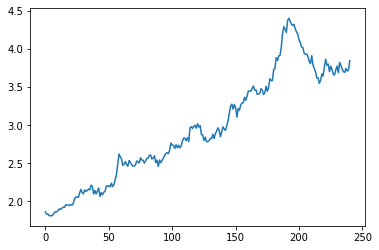

In [2]:
df = pd.read_csv("data/price_of_ground_chuck.csv")

# pega segunda coluna do dataframe
var = df.columns.values[1]
series = np.array(df[var])
plt.plot(series)

---

### Exercício 7)

Carregue o arquivo `livro1.txt` conforme indicado abaixo, bem como o word embedding Glove com 50 dimensões em português utilizado em aula. Obtenha uma vetorização de texto com número máximo de tokens 5000 e tamanho da sentença com no máximo 30 tokens. A seguir obtenha a matriz de embeddings a partir das palavras desse arquivo e imprima palavras não convertidas. Qual a natureza da maior parte das palavras em que houveram falhas?

(a) Palavras com hífens, números e em outro idioma<br>
(b) Nomes próprios e caracteres especiais isolados<br>
(c) Palavras com caracteres não codificados corretamente no UTF-16<br>
(d) Palavras em outro idioma e caracteres isolados<br>

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from numpy.random import seed
from tensorflow.random import set_seed

In [13]:
path_to_glove_file = "./glove_s50.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Encontrados %s word vectors." % len(embeddings_index))

<ipython-input-13-ecfee5d4ff7a>:7: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  coefs = np.fromstring(coefs, "f", sep=" ")


Encontrados 929594 word vectors.


In [14]:
df = pd.read_csv("data/livro1.txt", delimiter='[\n\r]+', header=None, engine='python')
df

,0
0,Os curiosos acontecimentos que são o objeto de...
1,"Segundo a opinião geral, estavam deslocados, j..."
2,"À primeira vista, Oran é, na verdade, uma cida..."
3,"A própria cidade, vamos admiti-lo, é feia"
4,"com seu aspecto tranquilo, é preciso algum tem..."
...,...
538,"Queimava, na verdade, mas nem mais nem menos d..."
539,Toda a cidade estava com febre
540,Era essa pelo menos a impressão que perseguia ...
541,Mas essa impressão parecia-lhe insensata


In [15]:
texto = np.array(df)
print(texto[:5])
print(texto.shape)

[['Os curiosos acontecimentos que são o objeto desta crônica ocorreram em 194x, em Oran']
 ['Segundo a opinião geral, estavam deslocados, já que saíam um pouco do comum']
 ['À primeira vista, Oran é, na verdade, uma cidade comum e não passa de uma prefeitura francesa na costa argelina']
 ['A própria cidade, vamos admiti-lo, é feia']
 ['com seu aspecto tranquilo, é preciso algum tempo para se perceber o que a torna diferente de tantas outras cidades comerciais em todas as latitudes']]
(543, 1)


---

### Exercício 8)


A matriz de embedding  (`embedding_matrix`) contém a mesma representação para uma dada palavra do que o índice de embedding  (`embedding_index`), mas a quantidade de elementos da matriz é limitada ao vocabulário da base de dados que estamos trabalhando. Imprima a quantidade de elementos em ambos para conferir a diferença.

Utilize a configuração obtida no exercício anterior (base de texto e word embedding carregados), e obtenha os índices das palavras: `rato`, `médico`, `cidade` e `febre` calculados pelo vetorizador. 

A seguir, obtenha a soma da diferença absoluta (ou distância L1) entre as representações da palavra `rato` e aqueles obtidos por meio dos índices encontrados das palavras `médico`, `ouro`, `cidade` e `febre` na matriz de embedding (`embedding_matrix`), ou seja, dentre as palavras convertidas.

Qual palavra, das citadas acima dentro do vocabulário, é mais próxima de `rato` segundo o word embedding utilizado?

(a) Febre<br>
(b) Ouro<br>
(c) Médico<br>
(d) Médico e Febre empatados<br>


In [5]:
# verificar tamanho do indice e da matriz

In [6]:
# vetorizar palavras

In [7]:
# computar distancias

---

### Exercício 9)

Word2Vec com aprendizado de uma rede recorrente para classificação de sentenças. 

Iremos treinar uma rede neural capaz de diferenciar frases de dois livros diferentes, contidos nos arquivos `livro1.txt` e `livro2.txt`.

Com base no processo realizado nos exercícios anteriores, carregue os arquivos citados. Gere o vetorizador com máximo de tokens 5000 e sequência com máximo de 60 elementos/tokens e realize a conversão com os textos de ambos os livros em conjunto (dica: usar `np.vstack()` para empilhar as frases dos dois livros).

Depois crie o conjunto de treinamento e teste da seguinte forma:
* o conjunto de treinamento terá as 75% primeiras frases do livro1 seguida das 75% primeiras frases do livro2
* o conjunto de teste terá as 25% frases restantes do livro1 seguida das 25% frases restantes do livro 2
* monte vetores com os rótulos de treinamento e teste de forma que livro 1 seja a classe 0 e livro 2 seja a classe 1.

Projete uma rede Convolucional-recorrente com as seguintes camadas (todas com ativação ReLU exceto especificado outra)
* Embedding layer
* Conv1D com 32 filtros de tamanho 2 e zeropadding
* GRU com 32 unidades
* Densa com 32 unidades
* Dropout com taxa 25%
* Densa com 1 unidade e ativação sigmoide

Configure as sementes com seed(1) e set_seed(2), depois compile com a função entropia cruzada binária, otimizador adam (com seus parâmetros padrão) e compute a acurácia. Treine por 20 épocas com batch size 16.

Após o treinamento, a acurácia no conjunto de teste (use o método `evaluate`) está em qual intervalo?

(a) [99, 100]<br>
(b) [86, 91]<br>
(c) [92, 98]<br>
(d) [79, 85]<br>


In [9]:
# carregar livros em um unico array
# criar vetorizador
# criar conjuntos de treinamento e teste
# vetorizar conjuntos
# projetar rede
# configurar sementes, compilar e treinar
# avaliar acurácia de teste

---

### Exercício 10)

Word2Vec com aprendizado de uma rede totalmente convolucional, com convoluções dilatadas para classificação de sentenças. 

Considere o mesmo problema anteriormente abordado no exercício 9. Agora vamos utilizar uma rede Convolucional com convoluções dilatadas que é um método para reduzir dimensionalidade enquanto mantêm o campo receptivo local, utilizada por exemplo para aplicações com áudio (como a WaveNet), mas também aplicável para outros dados sequenciais. Veja uma explicação em: https://www.paperswithcode.com/method/dilated-convolution

A rede deve ter as seguintes camadas
* Embedding layer
* Conv1D com 32 filtros de tamanho 2, zeropadding e parâmetro `dilation_rate=2`
* Conv1D com 32 filtros de tamanho 2, zeropadding e parâmetro `dilation_rate=3`
* Conv1D com 64 filtros de tamanho 3, zeropadding e parâmetro `dilation_rate=4`
* Dropout com taxa 25%
* Densa com 1 unidade e ativação sigmoide

Configure as sementes com seed(1) e set_seed(2), depois compile com a função entropia cruzada binária, otimizador adam (com seus parâmetros padrão) e compute a acurácia. Treine por 20 épocas com batch size 16.

A acurácia no conjunto de teste (use o método `evaluate`) está em qual intervalo?

(a) [99, 100]<br>
(b) [86, 91]<br>
(c) [92, 98]<br>
(d) [79, 85]<br>

In [10]:
# projetar rede
# configurar sementes, compilar, treinar
# avaliar acurácia no teste